In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN

#from sklearnex import patch_sklearn
#patch_sklearn()
import numpy as np
import pandas as pd

#import fastkde
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.utils import resample
from sklearn.datasets import make_classification
from sklearn.metrics import classification_report as CR, RocCurveDisplay, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
!pip install Usearch

In [ ]:
from usearch.index import search, MetricKind, Matches

In [ ]:
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
	n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)

Counter({0: 9900, 1: 100})


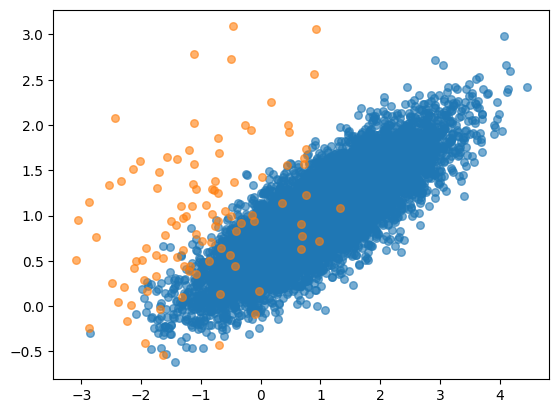

In [ ]:
counter = Counter(y)
print(counter)

for label, _ in counter.items():
  row_ix = np.where(y == label)[0]
  plt.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label), alpha= 0.6, s=30)
plt.show()

In [ ]:
oversample = SMOTE()
Xs, ys = oversample.fit_resample(X, y)

Counter({0: 9900, 1: 9900})


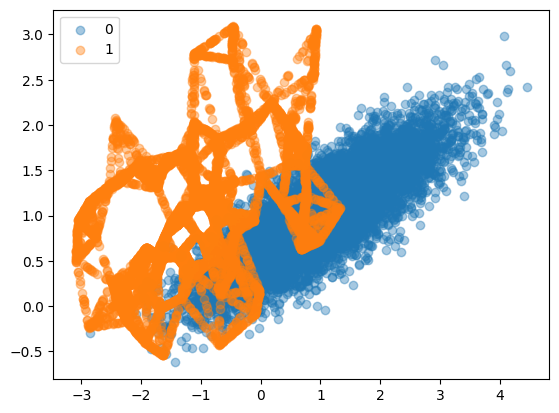

In [ ]:
counter = Counter(ys)
print(counter)
# scatter plot of examples by class label
for label, _ in counter.items():
	row_ix = np.where(ys == label)[0]
	plt.scatter(Xs[row_ix, 0], Xs[row_ix, 1], label=str(label),alpha=0.4)
plt.legend()
plt.show()

In [ ]:
ada = ADASYN(random_state=42)
Xada, yada = ada.fit_resample(X, y)

Counter({0: 9900, 1: 9900})


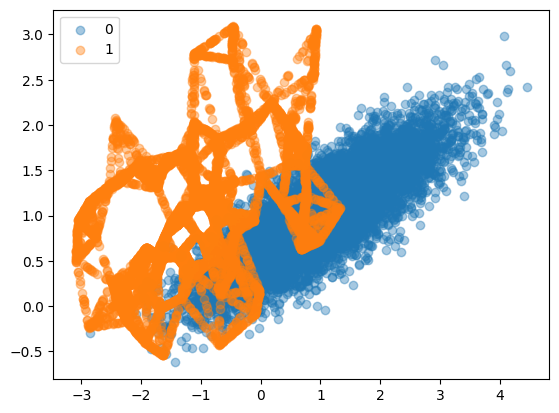

In [ ]:
counter = Counter(ys)
print(counter)
# scatter plot of examples by class label
for label, _ in counter.items():
	row_ix = np.where(ys == label)[0]
	plt.scatter(Xs[row_ix, 0], Xs[row_ix, 1], label=str(label),alpha=0.4)
plt.legend()
plt.show()

In [ ]:
!pip install -q fastKDE
import fastkde

In [ ]:
minority_features = X[y==1]
lb = minority_features.min(axis=0)
ub = minority_features.max(axis=0)
testpoints = np.random.uniform(low=lb,high=ub, size=(10000,2))

pdf = fastkde.pdf_at_points(minority_features[:,0],minority_features[:,1],list_of_points=testpoints,num_points=2**9+1)

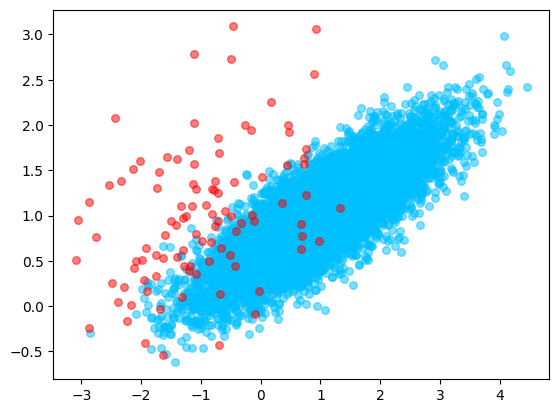

In [ ]:
plt.scatter(X[y==0,0],X[y==0,1],color='DeepSkyBlue',s=30,alpha=0.5)
plt.scatter(X[y==1,0],X[y==1,1],color='red',s=30,alpha=0.5)
plt.show()

In [ ]:
fakes = testpoints[pdf>np.percentile(pdf,65)]

Xf = np.row_stack([X,fakes])
yf = np.concatenate([y,np.ones(len(fakes))])

# K-Fold

In [ ]:
from sklearn.model_selection import KFold

num_splits = 5

kf = KFold(n_splits=num_splits, shuffle=True, random_state=1)

for fold, (train_index, test_index) in enumerate(kf.split(Xf)):
    Xf_train, Xf_test = Xf[train_index], Xf[test_index]
    yf_train, yf_test = yf[train_index], yf[test_index]

In [ ]:
for fold, (train_index, test_index) in enumerate(kf.split(Xs)):
    Xs_train, Xs_test = Xs[train_index], Xs[test_index]
    ys_train, ys_test = ys[train_index], ys[test_index]


In [ ]:
for fold, (train_index, test_index) in enumerate(kf.split(Xada)):
    Xada_train, Xada_test = Xada[train_index], Xada[test_index]
    yada_train, yada_test = yada[train_index], yada[test_index]


#NN

In [ ]:
class Nearest_Neighbors:
  def __init__(self, X, y, k=10):
    self.classification = y
    self.vectors = X
    self.k = k
    self.output = []

  def predict(self, x_new):
    output: Matches = search(self.vectors, x_new, self.k, MetricKind.L2sq, exact=True)
    prediction = []
    for out in output:
      nearest = self.classification[out.keys]
      counts = Counter(nearest)
      prediction.append(max(counts, key=counts.get))
    return prediction

In [ ]:
model1 = Nearest_Neighbors(Xf_train, yf_train, k=2)

In [ ]:
print(CR(yf_test,model1.predict(Xf_test)))

              precision    recall  f1-score   support

         0.0       0.93      0.94      0.94      1966
         1.0       0.83      0.82      0.82       734

    accuracy                           0.91      2700
   macro avg       0.88      0.88      0.88      2700
weighted avg       0.91      0.91      0.91      2700



In [ ]:
model1 = Nearest_Neighbors(Xs_train, ys_train, k=2)
print(CR(ys_test,model1.predict(Xs_test)))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95      2038
           1       0.94      0.96      0.95      1922

    accuracy                           0.95      3960
   macro avg       0.95      0.95      0.95      3960
weighted avg       0.95      0.95      0.95      3960



In [ ]:
model1 = Nearest_Neighbors(Xada_train, yada_train, k=2)
print(CR(yada_test,model1.predict(Xada_test)))

              precision    recall  f1-score   support

           0       0.97      0.92      0.94      2037
           1       0.92      0.97      0.94      1922

    accuracy                           0.94      3959
   macro avg       0.94      0.94      0.94      3959
weighted avg       0.94      0.94      0.94      3959

